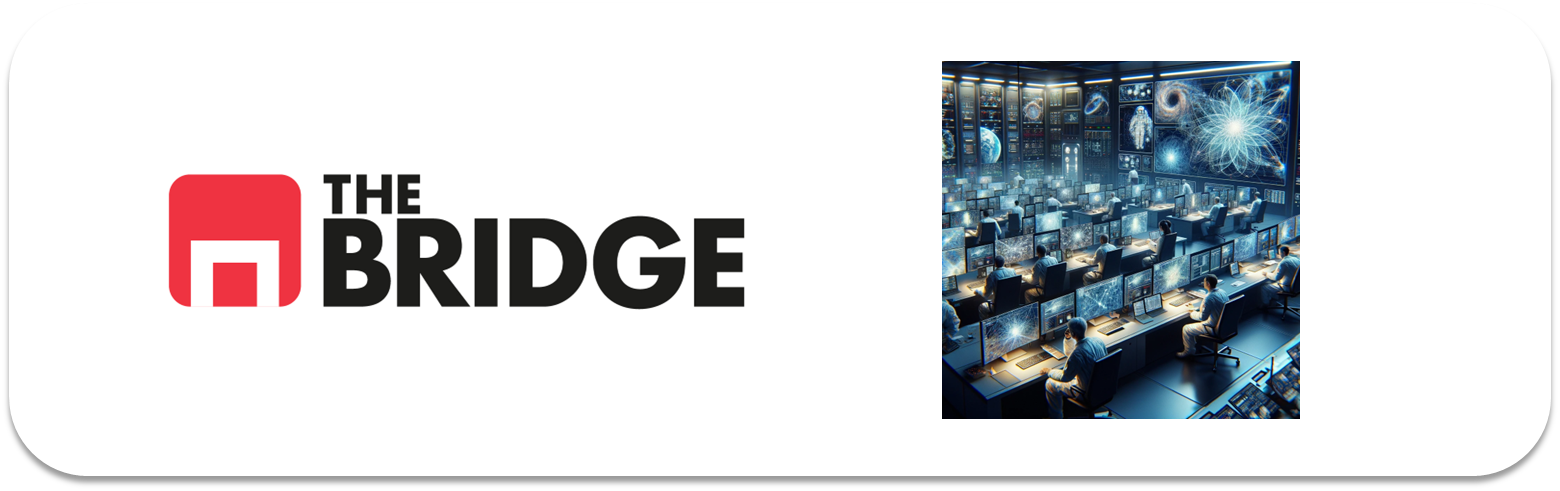

## PRACTICA OBLIGATORIA: **Redes Convolucionales**

* La práctica obligatoria de esta unidad consiste en un ejercicio de construcción de una red convolucional con Keras para la clasificación de imagenes de simpáticos perretes y gatetes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd 
import random

from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from skimage.io import imread
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

from time import time

### Problema de Negocio y dataset

Una conocida empresa de información inmobiliaria utiliza un CAPTCHA visual de perros y gatos para detectar webscrappings intensivos y ataques de denegación de servicio. Últimamente, ha detectado que su sistema está empezando a flojear, es decir que hay muchos sistemas de detección automática de imágenes que son capaces de detectar que es un perro y un gato y salterse el CAPTCHA antirobots. Por eso nos ha pedido que entrenemos un modelo potente de clasificación que emule a estos sistemas con el objetivo de emplear como fotografías para el CAPTCHA aquellas que no sepa detectar este sistema emulador de chicos malos.  

Pues manos a la obra, tenemos que seleccionar en un conjunto de 1000 imágenes aquellas que peor se le daría clasificar a un potencial sistema anti-CAPTCHA.  

Para ello vamos a emplear un conjunto de train de 4000 imágenes de perretes y gatetes que se encuentran distribuidas en "data" en cuatro directorios "github_train_0",  "github_train_1", "githun_train_2" y "github_train_3". Los datos de las imagenes que tenemos que clasificar y luego seleccionar como las más "difíciles" están en "data" en el directorio "github_test".


### Se pide

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras. 



In [2]:
def read_data(directories, reshape_dim = (32,32)):
    X = [] 
    y = []
    img_map_file = []
    directories = directories if isinstance(directories, list) else [directories] if isinstance(directories,str) else []
    for directory in directories:
        for file in os.listdir(directory):
            image = imread('/'.join([directory, file]))
            image = cv2.resize(image, reshape_dim)
            X.append(image)
            y.append(file.split('.')[0])
            img_map_file.append(file)

    return np.array(X),np.array(y),img_map_file

In [3]:
PATH_DATA = './data/'
directories  = [f'{PATH_DATA}github_train_{i}' for i in range(0,4)]
directories

['./data/github_train_0',
 './data/github_train_1',
 './data/github_train_2',
 './data/github_train_3']

In [4]:
X_train, y_train, train_map = read_data(directories)

In [5]:
directorios  = [PATH_DATA + 'github_test']
X_test, y_test, test_map = read_data(directorios)

In [6]:
X_train

array([[[[126, 100,  64],
         [118,  92,  53],
         [129, 104,  63],
         ...,
         [ 88,  69,  45],
         [ 98,  40,  25],
         [121,  72,  50]],

        [[113,  92,  61],
         [122, 102,  68],
         [131, 111,  75],
         ...,
         [131,  75,  57],
         [ 99,  53,  23],
         [ 99,  42,  22]],

        [[120,  96,  64],
         [133, 110,  74],
         [126, 103,  63],
         ...,
         [ 79,  25,  12],
         [ 50,  12,   2],
         [ 79,  32,   6]],

        ...,

        [[ 15,  15,  10],
         [ 82,  79,  69],
         [ 73,  67,  51],
         ...,
         [103,  95,  69],
         [ 83,  75,  53],
         [ 98,  92,  60]],

        [[ 97,  99,  88],
         [ 66,  63,  49],
         [ 80,  69,  51],
         ...,
         [ 70,  61,  39],
         [ 88,  79,  61],
         [100,  92,  68]],

        [[ 63,  55,  44],
         [ 64,  55,  39],
         [ 82,  71,  50],
         ...,
         [ 86,  72,  46],
        

In [7]:
X_train.ndim

4

In [8]:
X_train.shape

(4000, 32, 32, 3)

In [9]:
type(X_train[123])

numpy.ndarray

In [10]:
X_train.dtype

dtype('uint8')

In [11]:
X_train.shape

(4000, 32, 32, 3)

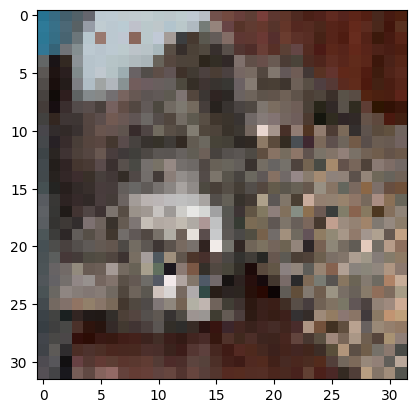

In [12]:
plt.imshow(X_test[3])

In [13]:
y_test[3]

np.str_('cat')

In [14]:
def show_images_batch(pets, names = [], n_cols = 5, size_scale = 2):
    n_rows = ((len(pets) - 1) // n_cols + 1)
    plt.figure(figsize=(n_cols * size_scale, n_rows * 1.1*size_scale))
    for index, pet in enumerate(pets):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(pet, cmap = 'Greys')
        plt.axis('off')
        if len(names):
            plt.title(names[index])

In [15]:
def show_images_files(pets, names = [], n_cols = 5, size_scale = 2, train = True, indice = 0):
    n_rows = ((len(pets) - 1) // n_cols + 1)
    plt.figure(figsize=(n_cols * size_scale, n_rows * 1.1*size_scale))
    for index, filepet in enumerate(pets):
        plt.subplot(n_rows, n_cols, index + 1)
        if train:
            pet = imread(PATH_DATA + f'github_train_{indice}/' + filepet)
        else:
            pet = imread(PATH_DATA + 'github_test/' + filepet)
        plt.imshow(pet, cmap = 'Greys')
        plt.axis('off')
        if len(names):
            plt.title(names[index])

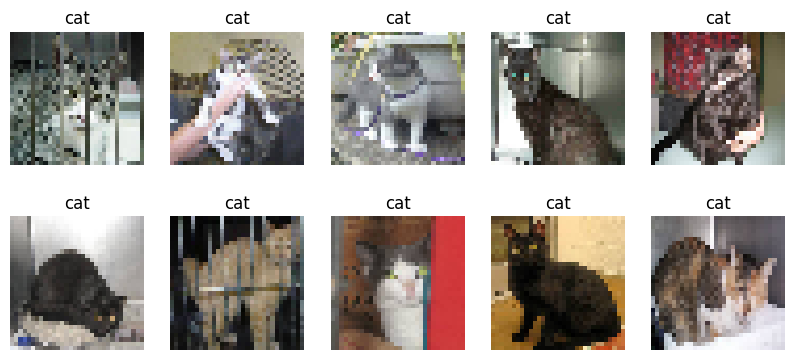

In [16]:
index = np.random.randint(100,300,10)
show_images_batch(X_train[index], names= y_train[index])

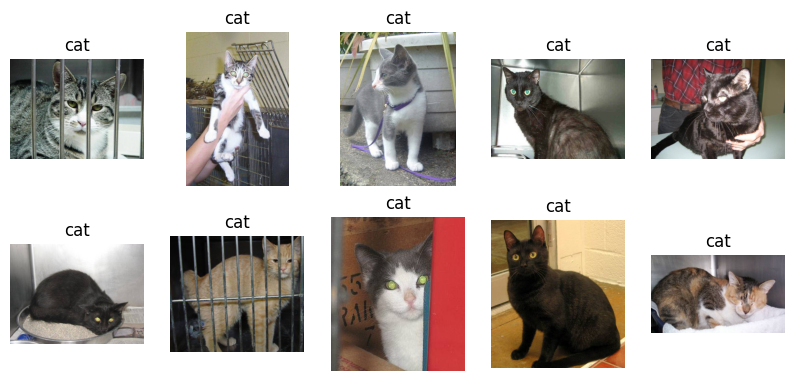

In [17]:
show_images_files([train_map[i] for i in index], names= y_train[index])

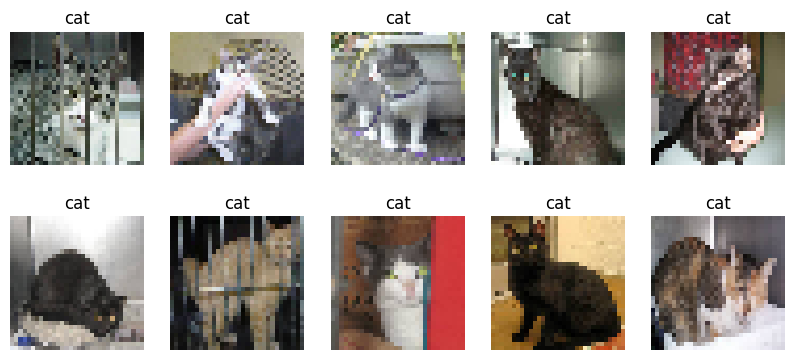

In [21]:
indexes = np.random.randint(2000,2300,10)
show_images_batch(X_train[index], names= y_train[index])

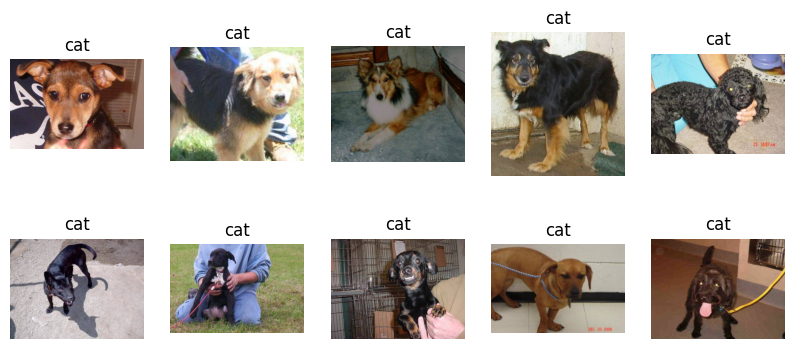

In [22]:
show_images_files([train_map[i] for i in indexes], names= y_train[index], train=2, indice=2)

In [23]:
pd.Series(y_train).value_counts(True)

cat    0.5
dog    0.5
Name: proportion, dtype: float64

In [24]:
# escalado

X_train = X_train/255
X_test = X_test/255

In [25]:
X_train[0]

array([[[0.49411765, 0.39215686, 0.25098039],
        [0.4627451 , 0.36078431, 0.20784314],
        [0.50588235, 0.40784314, 0.24705882],
        ...,
        [0.34509804, 0.27058824, 0.17647059],
        [0.38431373, 0.15686275, 0.09803922],
        [0.4745098 , 0.28235294, 0.19607843]],

       [[0.44313725, 0.36078431, 0.23921569],
        [0.47843137, 0.4       , 0.26666667],
        [0.51372549, 0.43529412, 0.29411765],
        ...,
        [0.51372549, 0.29411765, 0.22352941],
        [0.38823529, 0.20784314, 0.09019608],
        [0.38823529, 0.16470588, 0.08627451]],

       [[0.47058824, 0.37647059, 0.25098039],
        [0.52156863, 0.43137255, 0.29019608],
        [0.49411765, 0.40392157, 0.24705882],
        ...,
        [0.30980392, 0.09803922, 0.04705882],
        [0.19607843, 0.04705882, 0.00784314],
        [0.30980392, 0.1254902 , 0.02352941]],

       ...,

       [[0.05882353, 0.05882353, 0.03921569],
        [0.32156863, 0.30980392, 0.27058824],
        [0.28627451, 0

In [26]:
def tone_down_grey_scale(array_in, greys = True):
    def to_grey_scale(color_img):
        coefs = np.array([0.2989, 0.5870, 0.1140])
        grey_image = np.dot(color_img[...,:3], coefs)
        return grey_image

    if array_in.shape[-1] == 3 and greys:
        array_in = np.array([to_grey_scale(img) for img in array_in])
    return array_in.reshape(array_in.shape[0],-1)

In [27]:
X_train_rf = tone_down_grey_scale(X_train)
len(X_train_rf[0])

1024

In [28]:
shuffle_X_train_rf, shuffle_y_train = shuffle(X_train_rf, y_train, random_state = 42)

In [29]:
y_train[0:10]

array(['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat'], dtype='<U3')

In [30]:
shuffle_y_train[0:10]

array(['cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'cat', 'cat',
       'cat'], dtype='<U3')

In [31]:
rf_clf = RandomForestClassifier()
np.mean(cross_val_score(rf_clf, shuffle_X_train_rf, shuffle_y_train, cv = 5, scoring = 'accuracy'))

np.float64(0.6127499999999999)

In [32]:
# keras

layers = [
    keras.layers.Input(shape=(32,32,3)),
    keras.layers.Conv2D(64, (3,3), activation = 'relu', padding= 'same'), 
    keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'same'), 
    keras.layers.Dropout(rate = 0.25),

    keras.layers.Conv2D(128, (3,3), activation = 'relu', padding= 'same'),
    keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'same'), 
    keras.layers.Dropout(rate = 0.25),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'), 
    keras.layers.Dropout(rate = 0.5),
    keras.layers.Dense(1, activation='sigmoid') 
]

model = keras.Sequential(layers)

In [33]:
optimizer = keras.optimizers.Adam()

In [34]:
metrics = ['accuracy']
loss = 'binary_crossentropy' 

In [35]:
batch_size = 32
len(X_train)*0.8/batch_size

num_epochs = 100
earlyS = keras.callbacks.EarlyStopping(patience = 10)

In [36]:
model.compile(optimizer= optimizer,
              loss= loss,
              metrics= metrics)

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,270,977 (16.29 MB)

 Trainable params: 4,270,977 (16.29 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
y_train[np.array([1,2,3560])]

array(['cat', 'cat', 'dog'], dtype='<U3')

In [39]:
y_train_num = np.array([0 if y == 'cat' else 1 for y in y_train])

In [40]:
def prepare_model(): # res = (32,32)
    layers = [
    keras.layers.Input(shape=(32,32,3)),
    keras.layers.Conv2D(64,(3,3), activation = 'relu', padding= 'same'),
    keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'same'),
    keras.layers.Dropout(rate = 0.25),
    
    keras.layers.Conv2D(128,(3,3), activation = 'relu', padding= 'same'),
    keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'same'),
    keras.layers.Dropout(rate = 0.25),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(rate = 0.5),
    keras.layers.Dense(1, activation='sigmoid')
    ]
    
    model = keras.Sequential(layers)
    optimizer = keras.optimizers.Adam()
    metrics = ['accuracy']
    loss = 'binary_crossentropy'
    
    model.compile(optimizer= optimizer,
              loss= loss,
              metrics= metrics)
    
    return model

In [41]:
model = prepare_model()

t_zero = time()
hist = model.fit(X_train,
          y_train_num,
          epochs=1,
          batch_size= batch_size,
          callbacks = [earlyS],
          validation_split=0.2)

epoca_duration = time()-t_zero

100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - accuracy: 0.6080 - loss: 0.6962 - val_accuracy: 0.1675 - val_loss: 0.8749


In [42]:
print(epoca_duration)

13.085522174835205


In [43]:
model = prepare_model()
t_zero = time()
hist = model.fit(X_train,
          y_train_num,
          epochs= num_epochs,
          batch_size= batch_size,
          callbacks = [earlyS],
          validation_split=0.2)
epoca_duration = time()-t_zero

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.5997 - loss: 0.7819 - val_accuracy: 0.0000e+00 - val_loss: 0.8552
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.6268 - loss: 0.6498 - val_accuracy: 0.6550 - val_loss: 0.6889
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.6659 - loss: 0.6150 - val_accuracy: 0.2525 - val_loss: 0.9286
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.6912 - loss: 0.5811 - val_accuracy: 0.2700 - val_loss: 1.0578
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.7063 - loss: 0.5720 - val_accuracy: 0.5550 - val_loss: 0.7426
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.7265 - loss: 0.5556 - val_accuracy: 0.6862 - val_loss: 0.6160
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.7355 - loss: 0.5323 - val_accuracy: 0.6438 - val_loss: 0.6387
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.7543 - loss: 

In [44]:
print(epoca_duration)

221.16031503677368


In [45]:
y_test_num = np.array([0 if y == 'cat' else 1 for y in y_test])

results = model.evaluate(X_test, y_test_num)
results

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7899 - loss: 0.5705


[0.7544240355491638, 0.7419999837875366]

In [46]:
X_shuffle, y_shuffle = shuffle(X_train,y_train_num)

In [47]:
model = prepare_model()

t_zero = time()
hist_shuffle = model.fit(X_shuffle,
          y_shuffle,
          epochs= num_epochs,
          batch_size= batch_size,
          callbacks = [earlyS],
          validation_split=0.2)
epoca_duration = time()-t_zero

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.4889 - loss: 0.7960 - val_accuracy: 0.5263 - val_loss: 0.6927
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.5604 - loss: 0.6853 - val_accuracy: 0.6012 - val_loss: 0.6622
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.6166 - loss: 0.6490 - val_accuracy: 0.6250 - val_loss: 0.6493
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.6503 - loss: 0.6223 - val_accuracy: 0.6637 - val_loss: 0.6266
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.6967 - loss: 0.5861 - val_accuracy: 0.6750 - val_loss: 0.6028
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.7145 - loss: 0.5596 - val_accuracy: 0.6250 - val_loss: 0.6665
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.7173 - loss: 0.5554 - val_accuracy: 0.7038 - val_loss: 0.5807
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.7211 - loss: 0.5436

In [48]:
y_test_num = np.array([0 if y == "cat" else 1 for y in y_test])
results = model.evaluate(X_test,y_test_num)
print("test loss, test acc:", results)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7113 - loss: 0.6238
test loss, test acc: [0.6795100569725037, 0.7129999995231628]


In [49]:
df_evolved = pd.DataFrame(hist.history)
df_evolved_shuffle = pd.DataFrame(hist_shuffle.history)

<Axes: >

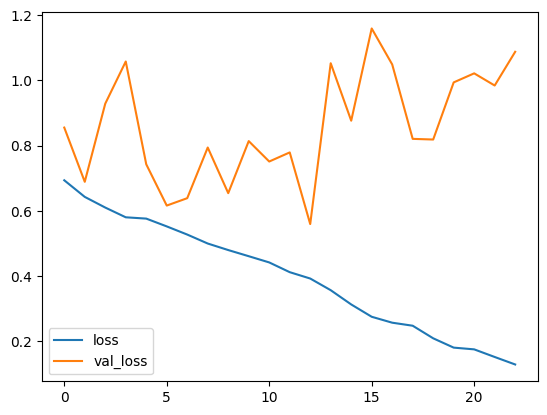

In [50]:
df_evolved[['loss','val_loss']].plot()

<Axes: >

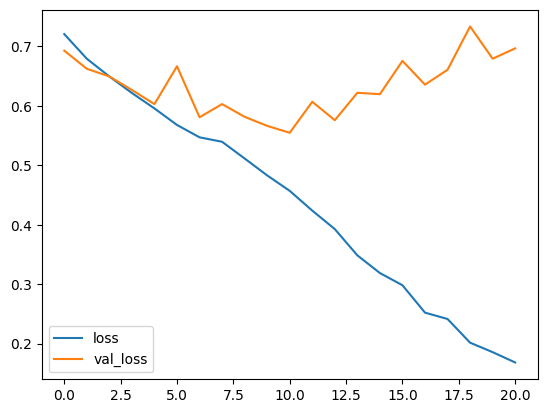

In [51]:
df_evolved_shuffle[['loss','val_loss']].plot()

In [52]:
preds = model.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [53]:
y_pred = ['dog' if prediction[0] > 0.5 else 'cat' for prediction in model.predict(X_test)]
print(classification_report(y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
              precision    recall  f1-score   support

         cat       0.71      0.72      0.71       500
         dog       0.72      0.71      0.71       500

    accuracy                           0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.71      0.71      1000



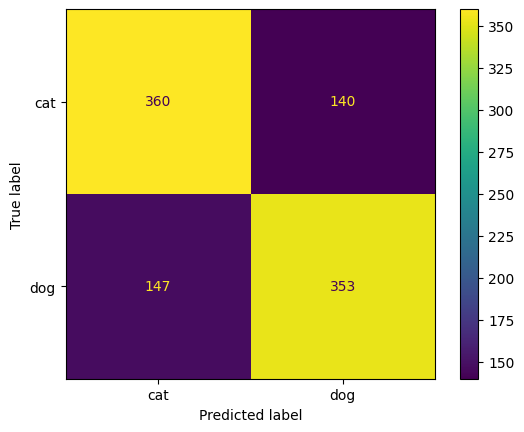

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [55]:
trust = [ (1-prediction[0]) if prediction[0] <= 0.5 else prediction[0] for prediction in model.predict(X_test)]
df_pred = pd.DataFrame({'files': test_map,'true': [file.split('.')[0] for file in test_map],'pred': y_pred, 'trust': trust})
df_pred

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


,files,true,pred,trust
0,cat.10705.jpg,cat,dog,0.566635
1,cat.10711.jpg,cat,cat,0.654102
2,cat.10714.jpg,cat,cat,0.836535
3,cat.10715.jpg,cat,dog,0.591145
4,cat.10716.jpg,cat,dog,0.664907
...,...,...,...,...
995,dog.9883.jpg,dog,dog,0.809492
996,dog.9884.jpg,dog,dog,0.602049
997,dog.9885.jpg,dog,dog,0.722567
998,dog.9889.jpg,dog,dog,0.875853


In [56]:
fails = df_pred['true'] != df_pred['pred']
cats = df_pred['true'] == 'cat'
doggies = df_pred['true'] == 'dog'
cuesta_gatos = df_pred[cats & fails]["trust"].nlargest(int(len(df_pred[cats & fails])*0.1)).index.to_list()
cuesta_perros = df_pred[doggies & fails]["trust"].nlargest(int(len(df_pred[doggies & fails])*0.1)).index.to_list()


In [57]:
df_pred.loc[cuesta_gatos]

,files,true,pred,trust
359,cat.11867.jpg,cat,dog,0.999995
337,cat.11793.jpg,cat,dog,0.999777
397,cat.11991.jpg,cat,dog,0.994719
178,cat.11250.jpg,cat,dog,0.994221
320,cat.11739.jpg,cat,dog,0.990235
229,cat.11462.jpg,cat,dog,0.985284
141,cat.11139.jpg,cat,dog,0.983332
291,cat.11644.jpg,cat,dog,0.980811
355,cat.11848.jpg,cat,dog,0.979562
246,cat.11526.jpg,cat,dog,0.979076


In [58]:
df_pred.loc[cuesta_perros]

,files,true,pred,trust
643,dog.8624.jpg,dog,cat,0.999997
867,dog.9434.jpg,dog,cat,0.999968
680,dog.8764.jpg,dog,cat,0.999904
888,dog.9509.jpg,dog,cat,0.999836
886,dog.9499.jpg,dog,cat,0.998786
893,dog.9530.jpg,dog,cat,0.998611
851,dog.9346.jpg,dog,cat,0.998482
536,dog.8214.jpg,dog,cat,0.997221
537,dog.8215.jpg,dog,cat,0.996637
740,dog.8958.jpg,dog,cat,0.991536


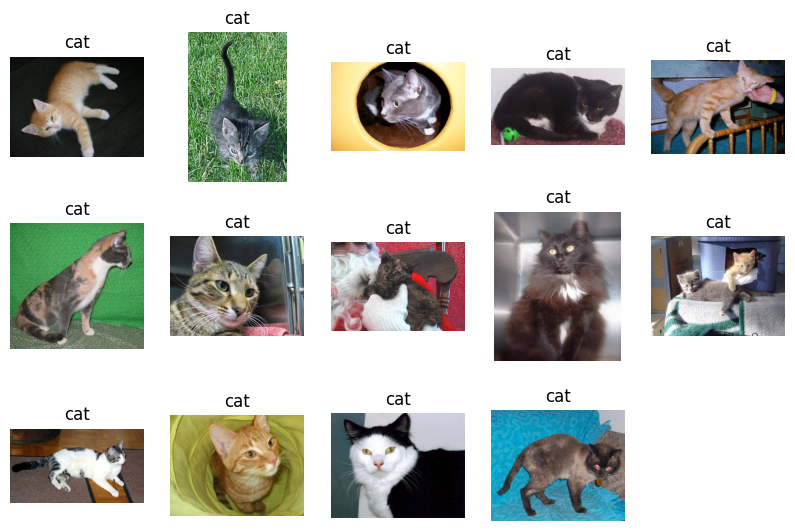

In [59]:
show_images_files(df_pred.loc[cuesta_gatos]['files'], df_pred.loc[cuesta_gatos]['true'].values, train = False)

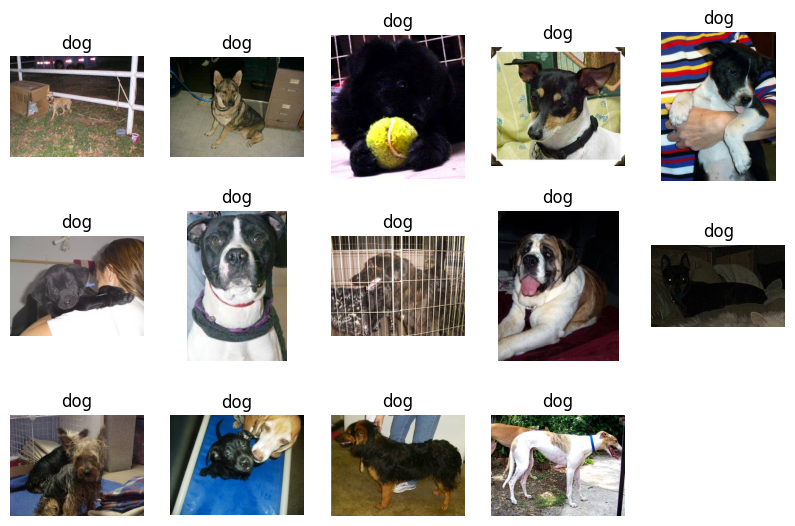

In [60]:
show_images_files(df_pred.loc[cuesta_perros]['files'], df_pred.loc[cuesta_perros]['true'].values, train = False)